In [68]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from itertools import chain

# import clsar package
import sys, os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=2)

In [69]:
df = pd.read_csv('./LII_results.csv', index_col = 0)
df = df[df.epoch == 0]
df = df[df.repre == 'latent']
dataset_order = df.groupby('dataset').lii.mean().sort_values().index

In [70]:
emb = 'emb_results_1000'

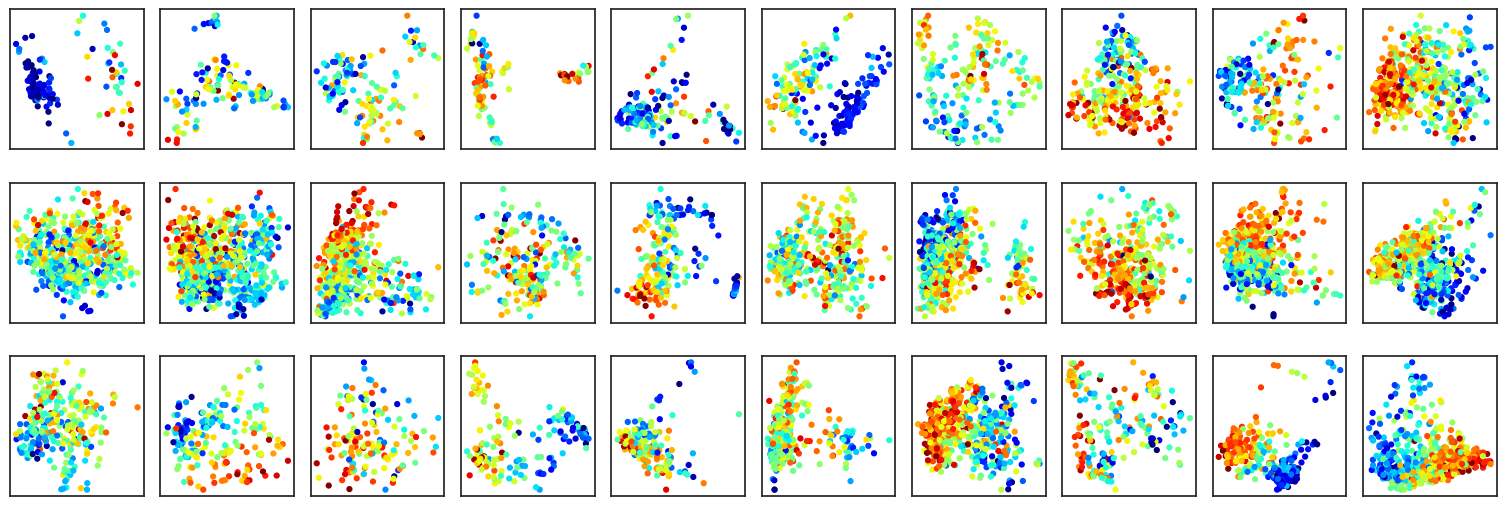

In [71]:
group = 'test'
hue = 'wo_aca'
dflii = df[(df.group == group) & (df.with_aca == hue)]
dflii = dflii.set_index('dataset').loc[dataset_order]


fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(15,5))
axes = list(chain(*axes))

for dataset, ax in zip(dataset_order, axes):
    dfm = pd.read_csv('./%s/%s/embedding_prediction.pkl' % (emb, dataset), index_col = 0)
    dfm = dfm[dfm.group == group]
    dfm = dfm[dfm.with_aca == hue]

    embeddings = dfm[dfm.columns[:512]].values
    y = dfm.y.values
    predictions = dfm.pred.values
    smiles_list = dfm.smiles.tolist()
    
    u = PCA(n_components=2)
    xy = u.fit_transform(embeddings)
    dfs = pd.DataFrame(xy,columns= ['dim1','dim2'])
    
    v=dfm['y'].values
    
    vmin = v.min()+0.2
    vmax = v.max()-0.2 
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet_r)
    node_color=[mpl.colors.to_hex(mapper.to_rgba(i)) for i in v]
    dfs['node_color'] = node_color

    ax.scatter(dfs.dim1, dfs.dim2, c = dfs.node_color, s=12)
    #ax.set_title(dataset, fontsize=8)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #ax.set_aspect('equal')  # 保持方形比例（可选）

    # ax.text(
    #     0.02, 0.97, dataset,           # 文本位置 (x, y), 用相对坐标 [0,1]
    #     transform=ax.transAxes,        # 使用 Axes 坐标系统
    #     fontsize=8,
    #     verticalalignment='top',
    #     horizontalalignment='left',
    #     #bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # 可选：加个背景框
    # )
    #ax.set_title(dataset,fontdict = {'fontsize':11})

# 紧密排列子图（关键）
# fig.subplots_adjust(wspace=0, hspace=0)  # 横向、纵向间距都为 0
# fig.tight_layout(pad=0, h_pad=0, w_pad=0, )

fig.tight_layout(pad = 0.2, h_pad=1, w_pad=0.5,) # 


#fig.savefig('./results/ep1000_%s_%s.svg' % (group, hue), bbox_inches = 'tight')
#fig.savefig('./results/ep1000_%s_%s.pdf' % (group, hue), bbox_inches = 'tight')
fig.savefig('./results/ep1000_%s_%s.png' % (group, hue), dpi=300, bbox_inches = 'tight')

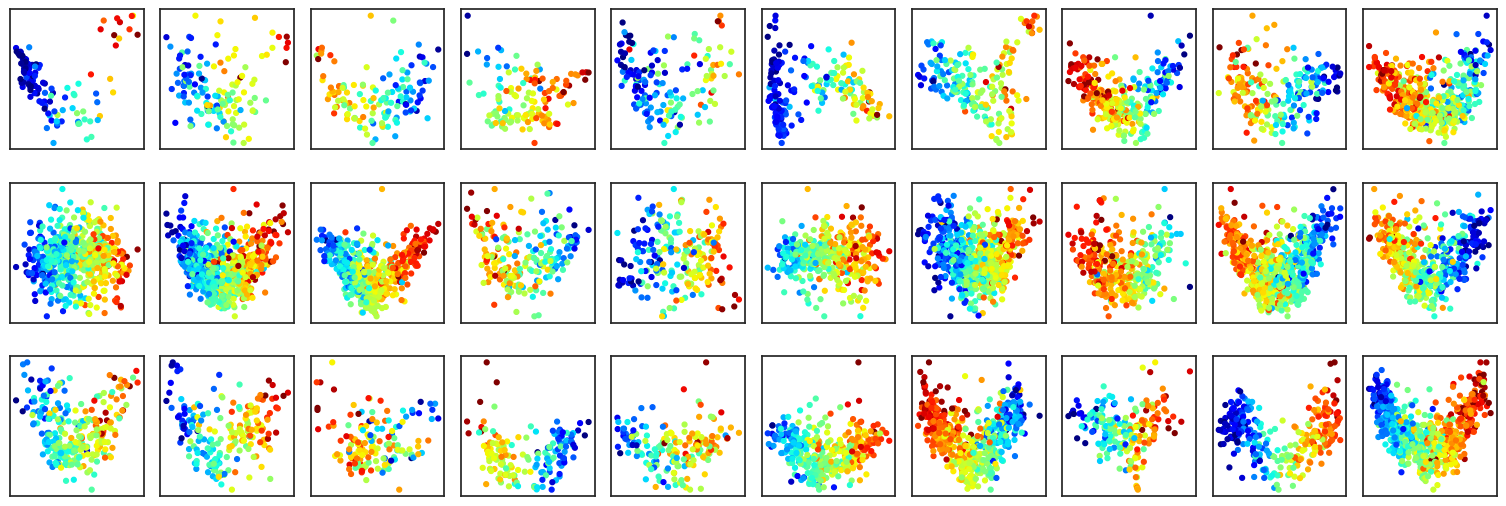

In [72]:
group = 'test'
hue = 'wi_aca'
dflii = df[(df.group == group) & (df.with_aca == hue)]
dflii = dflii.set_index('dataset').loc[dataset_order]

fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(15,5))
axes = list(chain(*axes))

for dataset, ax in zip(dataset_order, axes):
    dfm = pd.read_csv('./%s/%s/embedding_prediction.pkl' % (emb, dataset), index_col = 0)
    dfm = dfm[dfm.group == group]
    dfm = dfm[dfm.with_aca == hue]

    embeddings = dfm[dfm.columns[:512]].values
    y = dfm.y.values
    predictions = dfm.pred.values
    smiles_list = dfm.smiles.tolist()
    
    u = PCA(n_components=2)
    xy = u.fit_transform(embeddings)
    dfs = pd.DataFrame(xy,columns= ['dim1','dim2'])
    
    v=dfm['y'].values
    
    vmin = v.min()+0.2
    vmax = v.max()-0.2 
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet_r)
    node_color=[mpl.colors.to_hex(mapper.to_rgba(i)) for i in v]
    dfs['node_color'] = node_color

    ax.scatter(dfs.dim1, dfs.dim2, c = dfs.node_color, s=12)
    #ax.set_title(dataset, fontsize=8)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #ax.set_aspect('equal')  # 保持方形比例（可选）

    # ax.text(
    #     0.02, 0.97, dataset,           # 文本位置 (x, y), 用相对坐标 [0,1]
    #     transform=ax.transAxes,        # 使用 Axes 坐标系统
    #     fontsize=8,
    #     verticalalignment='top',
    #     horizontalalignment='left',
    #     #bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # 可选：加个背景框
    # )
    #ax.set_title(dataset,fontdict = {'fontsize':11})

# 紧密排列子图（关键）
# fig.subplots_adjust(wspace=0, hspace=0)  # 横向、纵向间距都为 0
# fig.tight_layout(pad=0, h_pad=0, w_pad=0, )

fig.tight_layout(pad = 0.2, h_pad=1, w_pad=0.5,) # 


#fig.savefig('./results/ep1000_%s_%s.svg' % (group, hue), bbox_inches = 'tight')
#fig.savefig('./results/ep1000_%s_%s.pdf' % (group, hue), bbox_inches = 'tight')
fig.savefig('./results/ep1000_%s_%s.png' % (group, hue), dpi=300, bbox_inches = 'tight')

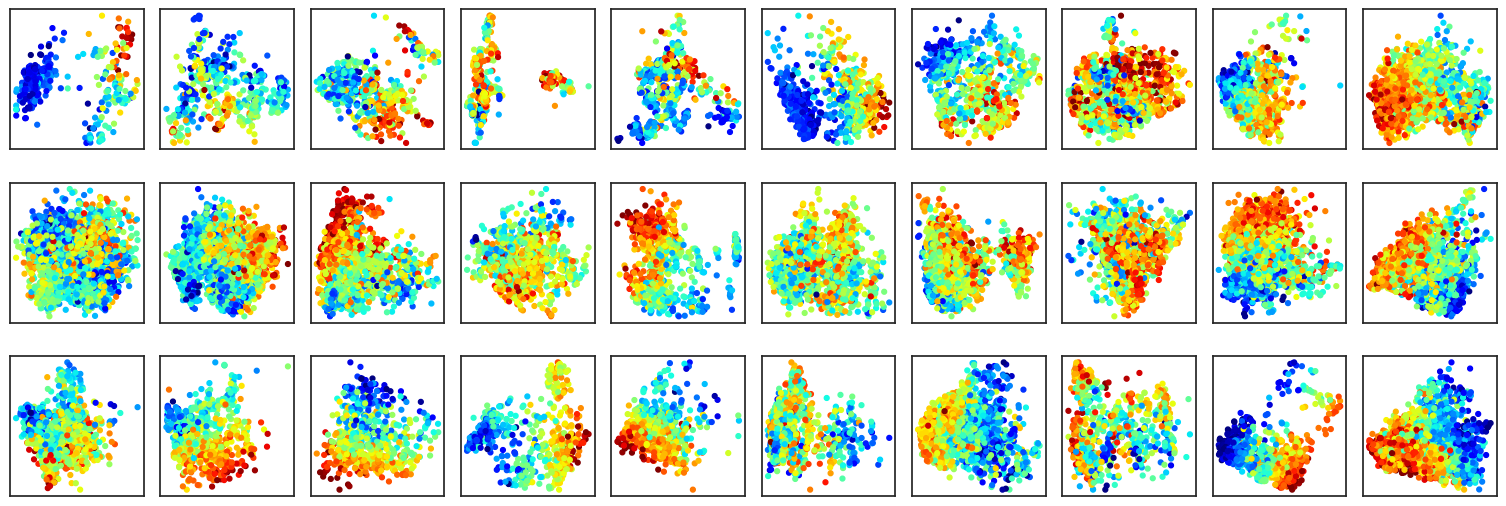

In [73]:
group = 'train'
hue = 'wo_aca'
dflii = df[(df.group == group) & (df.with_aca == hue)]
dflii = dflii.set_index('dataset').loc[dataset_order]

fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(15,5))
axes = list(chain(*axes))

for dataset, ax in zip(dataset_order, axes):
    dfm = pd.read_csv('./%s/%s/embedding_prediction.pkl' % (emb, dataset), index_col = 0)
    dfm = dfm[dfm.group == group]
    dfm = dfm[dfm.with_aca == hue]

    embeddings = dfm[dfm.columns[:512]].values
    y = dfm.y.values
    predictions = dfm.pred.values
    smiles_list = dfm.smiles.tolist()
    
    u = PCA(n_components=2)
    xy = u.fit_transform(embeddings)
    dfs = pd.DataFrame(xy,columns= ['dim1','dim2'])
    
    v=dfm['y'].values
    
    vmin = v.min()+0.2
    vmax = v.max()-0.2 
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet_r)
    node_color=[mpl.colors.to_hex(mapper.to_rgba(i)) for i in v]
    dfs['node_color'] = node_color

    ax.scatter(dfs.dim1, dfs.dim2, c = dfs.node_color, s=12)
    #ax.set_title(dataset, fontsize=8)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #ax.set_aspect('equal')  # 保持方形比例（可选）

    # ax.text(
    #     0.02, 0.97, dataset,           # 文本位置 (x, y), 用相对坐标 [0,1]
    #     transform=ax.transAxes,        # 使用 Axes 坐标系统
    #     fontsize=8,
    #     verticalalignment='top',
    #     horizontalalignment='left',
    #     #bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # 可选：加个背景框
    # )
    #ax.set_title(dataset,fontdict = {'fontsize':11})

# 紧密排列子图（关键）
# fig.subplots_adjust(wspace=0, hspace=0)  # 横向、纵向间距都为 0
# fig.tight_layout(pad=0, h_pad=0, w_pad=0, )

fig.tight_layout(pad = 0.2, h_pad=1, w_pad=0.5,) # 


#fig.savefig('./results/ep1000_%s_%s.svg' % (group, hue), bbox_inches = 'tight')
#fig.savefig('./results/ep1000_%s_%s.pdf' % (group, hue), bbox_inches = 'tight')
fig.savefig('./results/ep1000_%s_%s.png' % (group, hue), dpi=300, bbox_inches = 'tight')

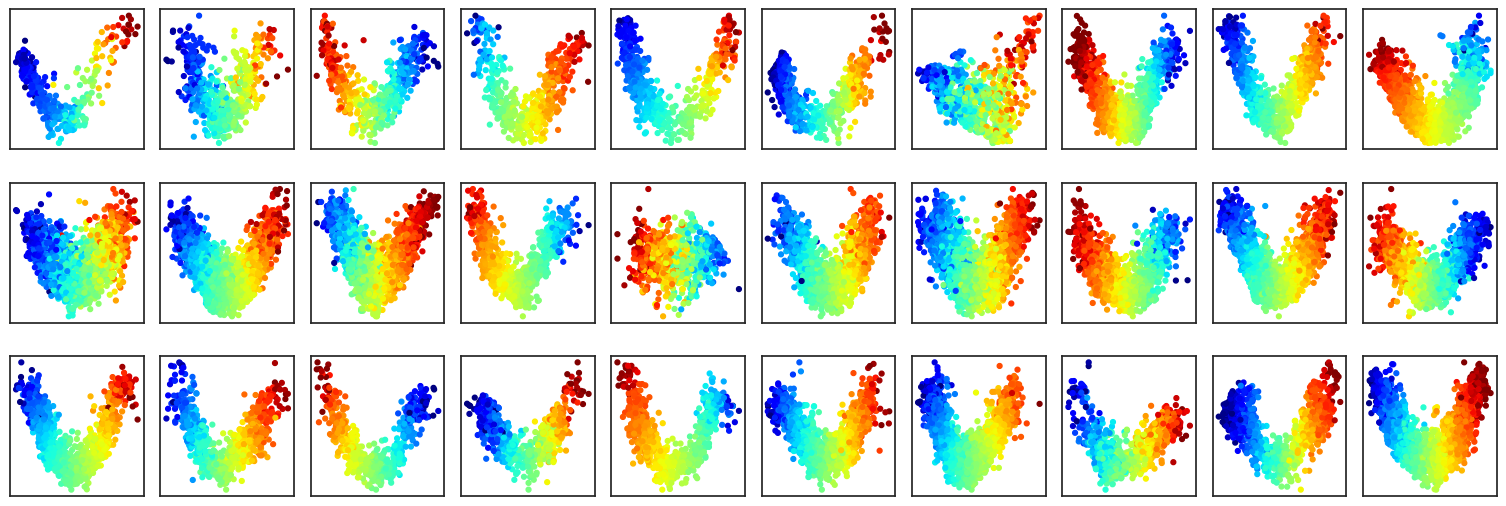

In [74]:
group = 'train'
hue = 'wi_aca'
dflii = df[(df.group == group) & (df.with_aca == hue)]
dflii = dflii.set_index('dataset').loc[dataset_order]

fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(15,5))
axes = list(chain(*axes))

for dataset, ax in zip(dataset_order, axes):
    dfm = pd.read_csv('./%s/%s/embedding_prediction.pkl' % (emb, dataset), index_col = 0)
    dfm = dfm[dfm.group == group]
    dfm = dfm[dfm.with_aca == hue]

    embeddings = dfm[dfm.columns[:512]].values
    y = dfm.y.values
    predictions = dfm.pred.values
    smiles_list = dfm.smiles.tolist()
    
    u = PCA(n_components=2)
    xy = u.fit_transform(embeddings)
    dfs = pd.DataFrame(xy,columns= ['dim1','dim2'])
    
    v=dfm['y'].values
    
    vmin = v.min()+0.2
    vmax = v.max()-0.2 
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet_r)
    node_color=[mpl.colors.to_hex(mapper.to_rgba(i)) for i in v]
    dfs['node_color'] = node_color

    ax.scatter(dfs.dim1, dfs.dim2, c = dfs.node_color, s=12)
    #ax.set_title(dataset, fontsize=8)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #ax.set_aspect('equal')  # 保持方形比例（可选）

    # ax.text(
    #     0.02, 0.97, dataset,           # 文本位置 (x, y), 用相对坐标 [0,1]
    #     transform=ax.transAxes,        # 使用 Axes 坐标系统
    #     fontsize=8,
    #     verticalalignment='top',
    #     horizontalalignment='left',
    #     #bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # 可选：加个背景框
    # )
    #ax.set_title(dataset,fontdict = {'fontsize':11})

# 紧密排列子图（关键）
# fig.subplots_adjust(wspace=0, hspace=0)  # 横向、纵向间距都为 0
# fig.tight_layout(pad=0, h_pad=0, w_pad=0, )

fig.tight_layout(pad = 0.2, h_pad=1, w_pad=0.5,) # 


#fig.savefig('./results/ep1000_%s_%s.svg' % (group, hue), bbox_inches = 'tight')
#fig.savefig('./results/ep1000_%s_%s.pdf' % (group, hue), bbox_inches = 'tight')
fig.savefig('./results/ep1000_%s_%s.png' % (group, hue), dpi=300, bbox_inches = 'tight')